In [1]:

%pprint
import sys
import os.path as osp
sys.path.insert(1, osp.abspath(osp.join(os.pardir, 'py')))
from StatsByCountry import nu, ssu

Pretty printing has been turned OFF


In [2]:

from matplotlib import rcParams

rcParams['lines.markersize'] ** 2

36.0

In [4]:

from StatsByCountry.notebook_utils import pd, plt, np
from matplotlib.patches import Polygon
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
import random

# Load the data from the CSV content
cultural_map_df = nu.load_csv('inglehart_welzel_cultural_map_data', folder_path=nu.saves_folder)

mask_series = (cultural_map_df.Country == 'Japan')
cultural_map_df[mask_series]

,Region,Country,pixel_x,pixel_y,Based_Rational_Values,Surviving_Flourishing_Values,Cluster
20,Confucian,Japan,513,46,1.96,0.32,4


In [5]:

# Extract the features for clustering
x_column = 'Surviving_Flourishing_Values'
y_column = 'Based_Rational_Values'
columns_list = [x_column, y_column]
X = cultural_map_df[columns_list]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=9, random_state=0)
cultural_map_df['Cluster'] = kmeans.fit_predict(X)

# Compute the Voronoi diagram
points = []
for cluster in cultural_map_df['Cluster'].unique():
    
    # Get the points in the current cluster
    cluster_points = cultural_map_df[cultural_map_df['Cluster'] == cluster]
    
    # Calculate the centroid of the cluster
    centroid = cluster_points[columns_list].mean()
    points.append(centroid.values)

# Create a Voronoi diagram from the centroids
centroids = [tuple(p) for p in points]
xlim_array = np.array([cultural_map_df[x_column].min()-1, cultural_map_df[x_column].max()+1])
ylim_array = np.array([cultural_map_df[y_column].min()-1, cultural_map_df[y_column].max()+1])
points.append(np.array([xlim_array.mean(), ylim_array.min()]))
points.append(np.array([xlim_array.mean(), ylim_array.max()]))
points.append(np.array([xlim_array.min(), ylim_array.mean()]))
points.append(np.array([xlim_array.min(), ylim_array.min()]))
points.append(np.array([xlim_array.min(), ylim_array.max()]))
points.append(np.array([xlim_array.max(), ylim_array.mean()]))
points.append(np.array([xlim_array.max(), ylim_array.min()]))
points.append(np.array([xlim_array.max(), ylim_array.max()]))
vor = Voronoi(np.array(points))

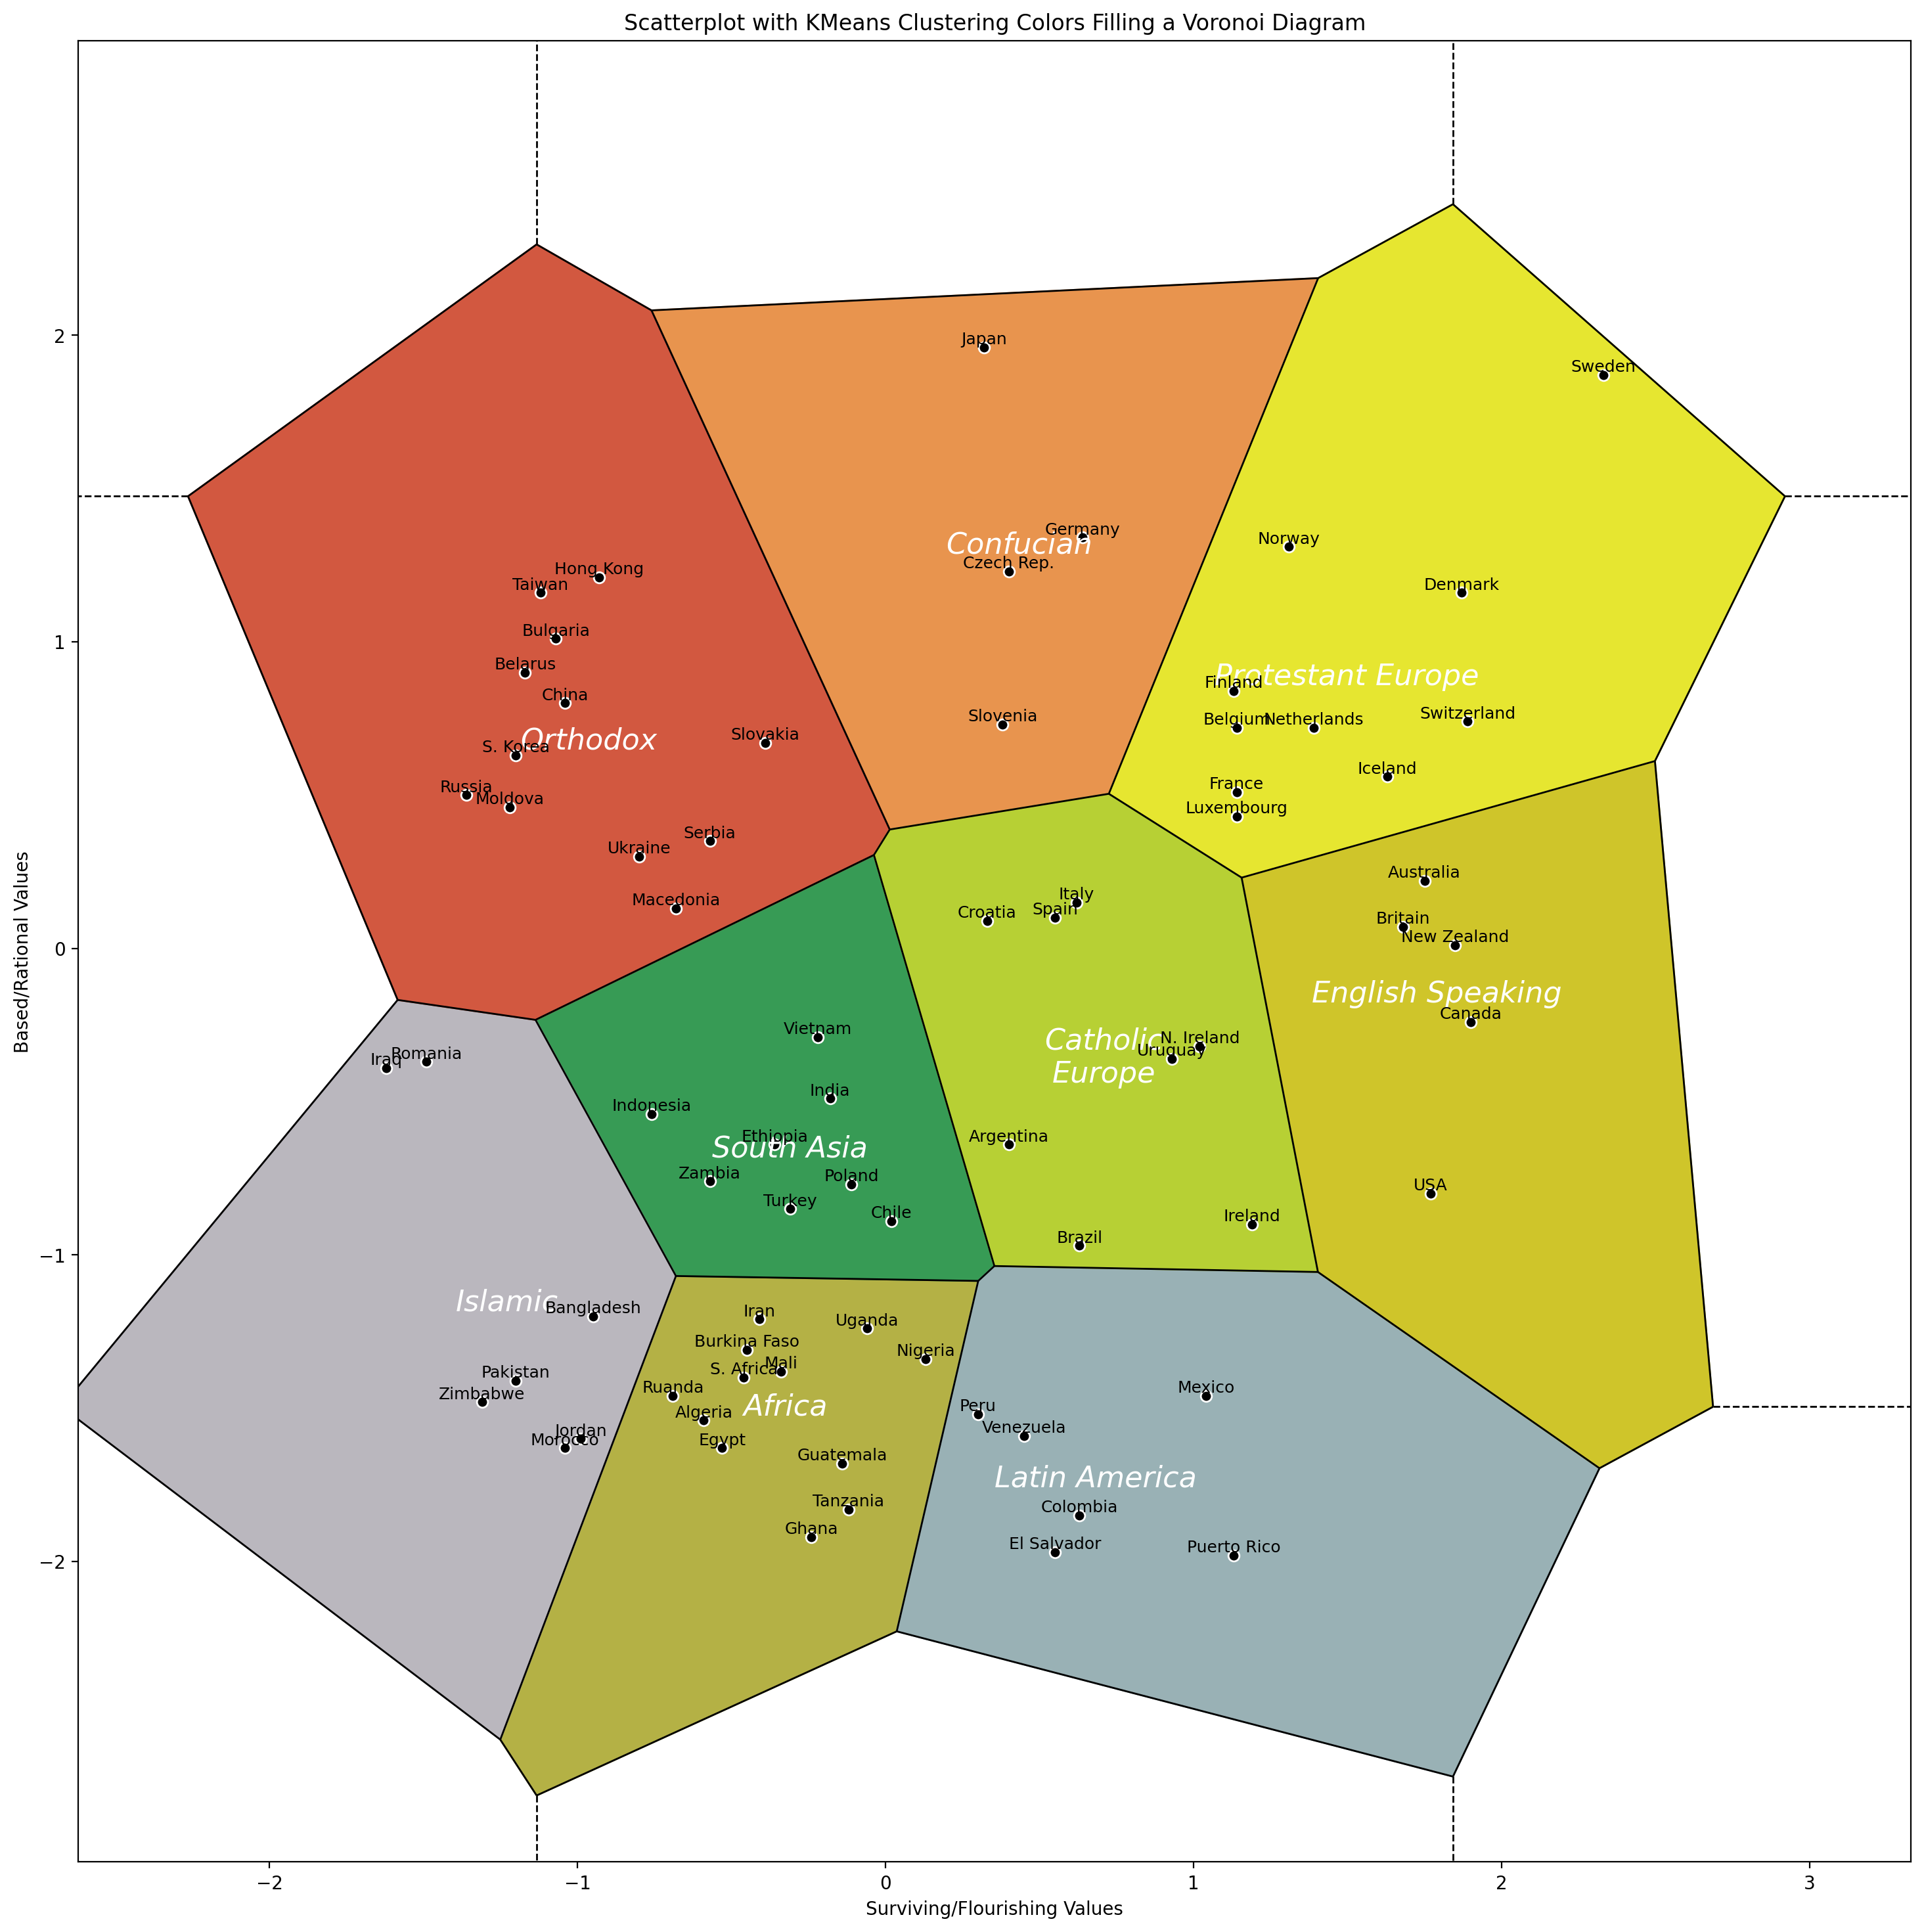

In [10]:

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(18, 18))

# Plot the Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors='black', line_width=1, alpha=0.6)

# Fill the Voronoi regions
colors_list = [
    (0.718, 0.816, 0.204, 1.0), (0.902, 0.902, 0.188, 1.0), (0.824, 0.345, 0.251, 1.0), (0.91, 0.58, 0.306, 1.0), (0.812, 0.773, 0.165, 1.0),
    (0.6, 0.694, 0.71, 1.0), (0.729, 0.718, 0.745, 1.0), (0.216, 0.608, 0.333, 1.0), (0.706, 0.694, 0.271, 1.0)
]
for region in vor.regions:
    if not -1 in region and len(region) > 0:  # Only fill finite regions
        polygon = [vor.vertices[i] for i in region]
        color = colors_list.pop()
        # print(color)
        ax.add_patch(Polygon(polygon, color=color, alpha=1.0))

# Annotate the fills in a larger italic font in white
names_list = ['Africa', 'Protestant Europe', 'Catholic\nEurope', 'Confucian', 'South Asia', 'Orthodox', 'English Speaking', 'Islamic', 'Latin America']
# print(centroids)
for name, centroid in zip(names_list, centroids):
    ax.annotate(
        name,
        centroid,
        va='center',
        ha='center',
        fontsize=16,  # Increase font size for better visibility
        color='white',  # Set annotation color to white
        fontstyle='italic'  # Italicize the font
    )

# Plot the original scatter points
scatter = ax.scatter(
    cultural_map_df[x_column],
    cultural_map_df[y_column],
    color='black',  # Change point color to black for visibility
    edgecolor='white'
)

# Annotate each point with the country name
for i, row in cultural_map_df.iterrows():
    ax.annotate(
        row['Country'],
        (row[x_column], row[y_column]),
        fontsize=9,  # Adjust font size as needed
        color='black',  # Set annotation color to white for contrast
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# Add labels and title
ax.set_xlabel('Surviving/Flourishing Values')
ax.set_ylabel('Traditional/Rational Values')
ax.set_title('Scatterplot with KMeans Clustering Colors Filling a Voronoi Diagram')
ax.set_xlim(*tuple(xlim_array))
ax.set_ylim(*tuple(ylim_array))
ax.grid(False)

# Show the plot
plt.show()

In [16]:

cultural_map_df.Country.to_dict()

{0: 'Burkina Faso', 1: 'Ghana', 2: 'Mali', 3: 'Nigeria', 4: 'Ruanda', 5: 'S. Africa', 6: 'Tanzania', 7: 'Uganda', 8: 'Belgium', 9: 'Croatia', 10: 'Czech Rep.', 11: 'France', 12: 'Italy', 13: 'Luxembourg', 14: 'Poland', 15: 'Slovakia', 16: 'Slovenia', 17: 'Spain', 18: 'China', 19: 'Hong Kong', 20: 'Japan', 21: 'S. Korea', 22: 'Taiwan', 23: 'Australia', 24: 'Britain', 25: 'Canada', 26: 'Ireland', 27: 'N. Ireland', 28: 'New Zealand', 29: 'USA', 30: 'Algeria', 31: 'Bangladesh', 32: 'Egypt', 33: 'Ethiopia', 34: 'Indonesia', 35: 'Iran', 36: 'Iraq', 37: 'Jordan', 38: 'Morocco', 39: 'Pakistan', 40: 'Turkey', 41: 'Zambia', 42: 'Zimbabwe', 43: 'Argentina', 44: 'Brazil', 45: 'Chile', 46: 'Colombia', 47: 'El Salvador', 48: 'Guatemala', 49: 'Mexico', 50: 'Peru', 51: 'Puerto Rico', 52: 'Uruguay', 53: 'Venezuela', 54: 'Belarus', 55: 'Bulgaria', 56: 'Macedonia', 57: 'Moldova', 58: 'Romania', 59: 'Russia', 60: 'Serbia', 61: 'Ukraine', 62: 'Denmark', 63: 'Finland', 64: 'Germany', 65: 'Iceland', 66: 'Net

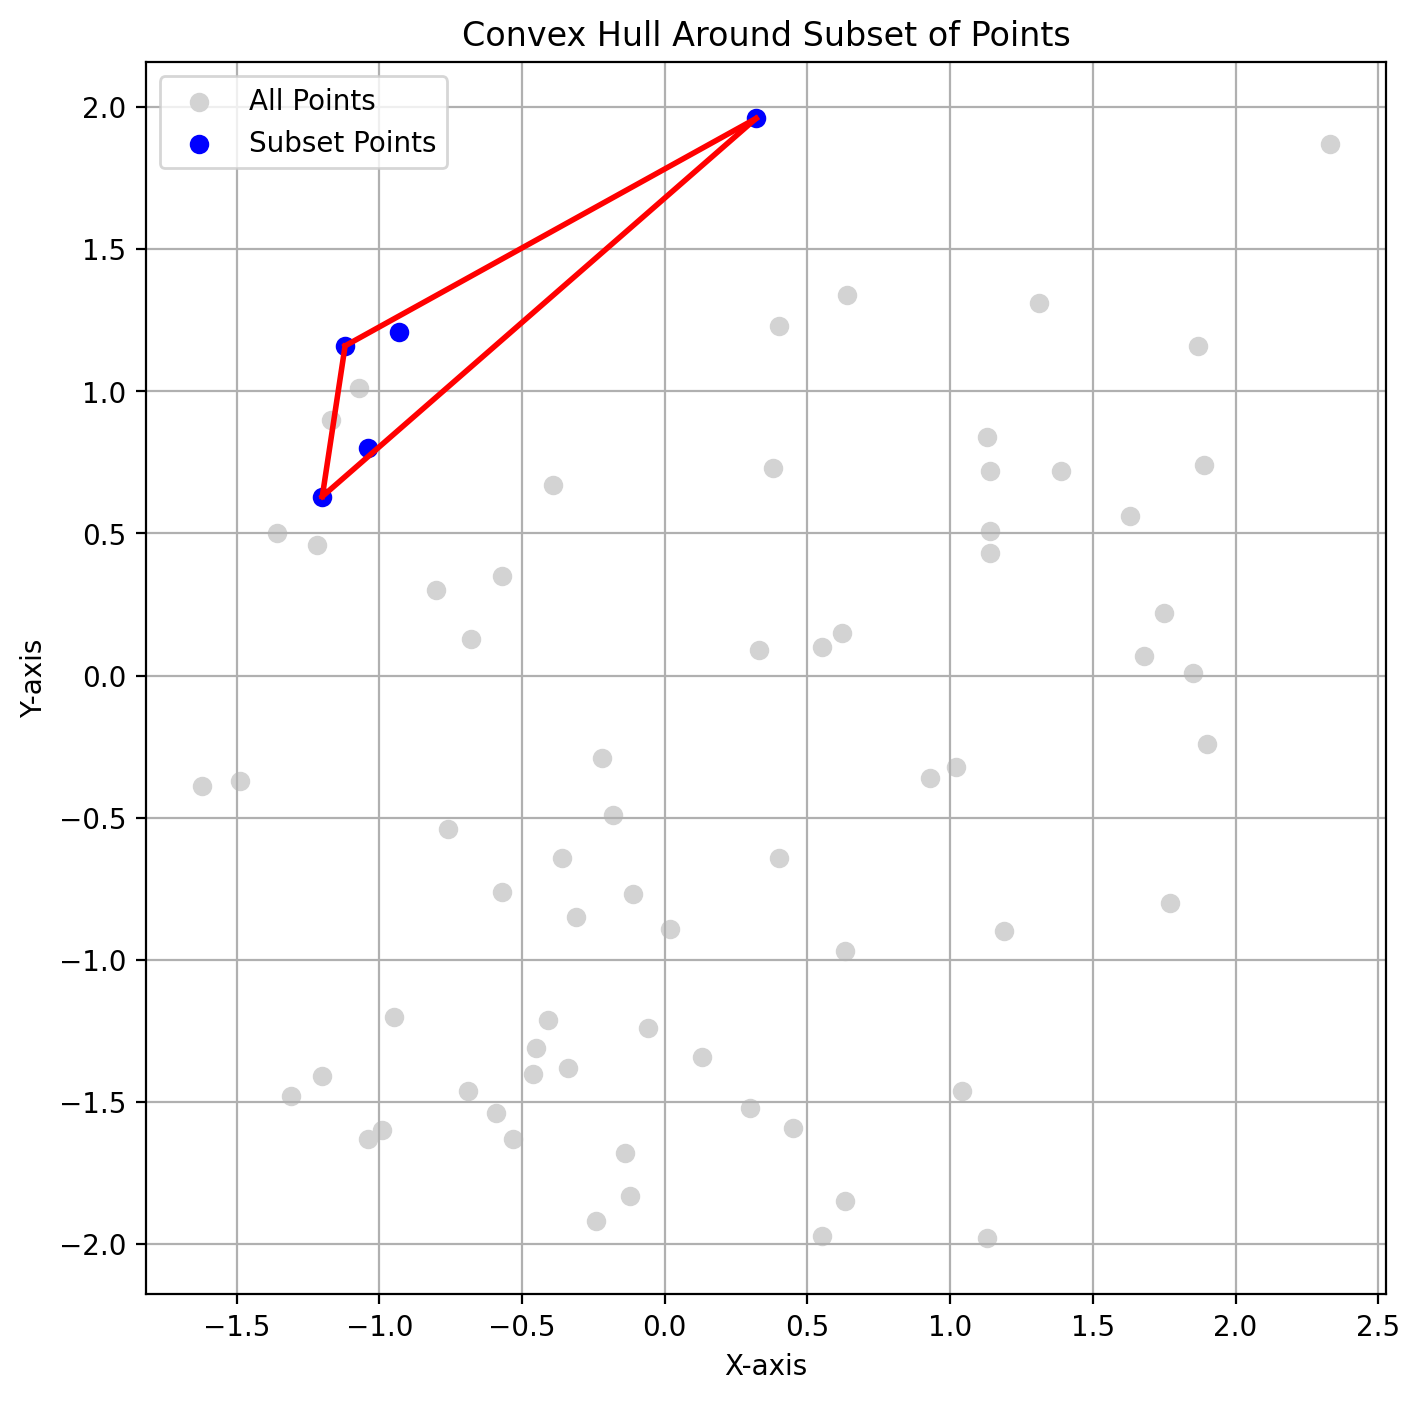

In [21]:

from scipy.spatial import ConvexHull

# Generate previous data points
points = X.values

# Select a subset of points to create a border around
subset_indices = [18, 19, 20, 21, 22]  # Confucian countries
subset_points = points[subset_indices]

# Compute the convex hull of the subset points
hull = ConvexHull(subset_points)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot all points
ax.scatter(points[:, 0], points[:, 1], color='lightgray', label='All Points')

# Plot the subset points
ax.scatter(subset_points[:, 0], subset_points[:, 1], color='blue', label='Subset Points')

# Draw the convex hull
for simplex in hull.simplices:
    ax.plot(subset_points[simplex, 0], subset_points[simplex, 1], 'r-', linewidth=2)

# Adding labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Convex Hull Around Subset of Points')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

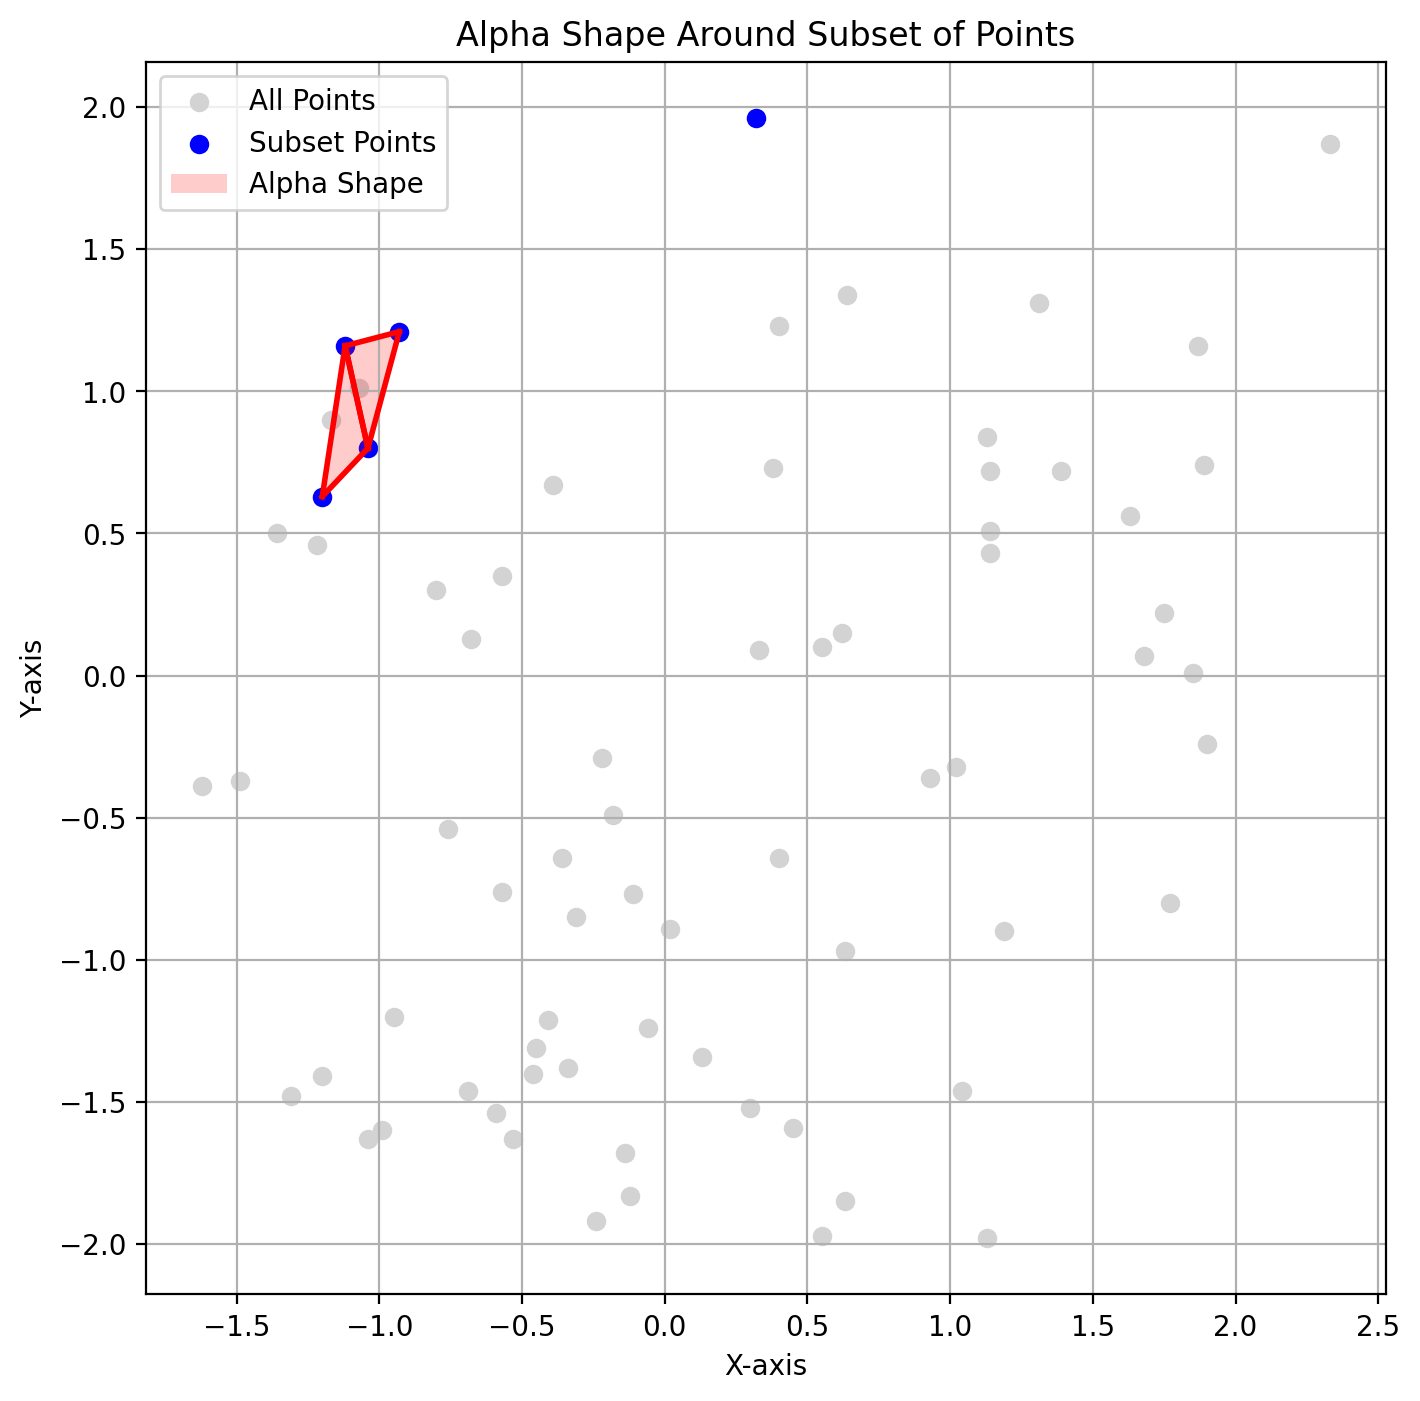

In [22]:

from scipy.spatial import Delaunay

# Function to compute the alpha shape
def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n_points, 2)
    :param alpha: alpha value to shape the concavity
    :return: list of edge points (x, y) tuples
    """
    if len(points) < 4:
        # When there are few points, the convex hull is the best we can do
        return points

    # Compute the Delaunay triangulation
    tri = Delaunay(points)

    edges = set()
    edge_points = []

    # Loop over triangles:
    # ia, ib, ic are indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]

        # Compute the circumradius
        a = np.linalg.norm(pb - pc)
        b = np.linalg.norm(pa - pc)
        c = np.linalg.norm(pa - pb)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        if area == 0:
            continue
        circum_r = a * b * c / (4.0 * area)

        # Filter out triangles with circumradius greater than alpha
        if circum_r < (1.0 / alpha):
            # Add edges of the triangle to the edge set
            edges.add( (ia, ib) )
            edges.add( (ib, ic) )
            edges.add( (ic, ia) )

    # Extract edge points
    for (i, j) in edges:
        edge_points.append(points[[i, j]])

    return edge_points

# Adjust the alpha parameter as needed
alpha = 2.0  # Smaller values lead to tighter shapes

# Compute the alpha shape
edge_points = alpha_shape(subset_points, alpha=alpha)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot all points
ax.scatter(points[:, 0], points[:, 1], color='lightgray', label='All Points')

# Plot the subset points
ax.scatter(subset_points[:, 0], subset_points[:, 1], color='blue', label='Subset Points')

# Plot the alpha shape edges
for edge in edge_points:
    ax.plot(edge[:, 0], edge[:, 1], 'r-', linewidth=2)

# Fill the alpha shape (optional)
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Create polygon patches
if len(edge_points) > 0:
    # Extract unique vertices
    from shapely.geometry import Polygon as ShapelyPolygon, MultiLineString
    from shapely.ops import polygonize

    edge_lines = [tuple(map(tuple, edge)) for edge in edge_points]
    m = MultiLineString(edge_lines)
    triangles = list(polygonize(m))
    if len(triangles) > 0:
        poly = max(triangles, key=lambda p: p.area)
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.2, fc='red', ec='none', label='Alpha Shape')

# Adding labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Alpha Shape Around Subset of Points')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [89]:

mask_series = cultural_map_df.Country.isnull()
sorted(cultural_map_df[~mask_series].Country)

['Algeria', 'Argentina', 'Australia', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Britain', 'Bulgaria', 'Burkina Faso', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Czech Rep.', 'Denmark', 'Egypt', 'El Salvador', 'Ethiopia', 'Finland', 'France', 'Germany', 'Ghana', 'Guatemala', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy', 'Japan', 'Jordan', 'Luxembourg', 'Macedonia', 'Mali', 'Mexico', 'Moldova', 'Morocco', 'N. Ireland', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Peru', 'Poland', 'Puerto Rico', 'Romania', 'Ruanda', 'Russia', 'S. Africa', 'S. Korea', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Tanzania', 'Turkey', 'USA', 'Uganda', 'Ukraine', 'Uruguay', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe']

In [66]:

mask_series = (cultural_map_df.Country == 'India')
regions_list = cultural_map_df[mask_series].Region.tolist()
mask_series = cultural_map_df.Region.isin(regions_list)
cultural_map_df[mask_series]

,Region,Country,pixel_x,pixel_y,Based_Rational_Values,Surviving_Flourishing_Values,Cluster
70,South Asia,India,418,506,-0.49,-0.18,0
71,South Asia,Vietnam,410,469,-0.29,-0.22,0


In [22]:

cultural_map_df.Surviving_Flourishing_Values = cultural_map_df.pixel_x.map(lambda x: round((x-452)/188, 2))
cultural_map_df.Based_Rational_Values = cultural_map_df.pixel_y.map(lambda y: round((414-y)/188, 2))
nu.save_data_frames(inglehart_welzel_cultural_map_data=cultural_map_df.sort_values(['Region', 'Country']))

Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\inglehart_welzel_cultural_map_data.csv


In [21]:

mask_series = (cultural_map_df.Region=='Latin America')
cultural_map_df[mask_series].sort_values(['Based_Rational_Values'])

,Region,Country,pixel_x,pixel_y,Based_Rational_Values,Surviving_Flourishing_Values,Cluster
44,Latin America,Uruguay,627,482,2.7,3.5,0
45,Latin America,Argentina,527,535,2.8,3.6,0
46,Latin America,Chile,456,582,2.9,3.7,6
47,Latin America,Brazil,571,596,3.0,3.8,6
48,Latin America,Mexico,648,688,3.1,3.9,6
49,Latin America,Peru,509,699,3.2,4.0,6
50,Latin America,Venezuela,537,712,3.3,4.1,6
51,Latin America,Colombia,570,762,3.4,4.2,6
52,Latin America,Puerto Rico,665,786,3.5,4.3,6
53,Latin America,El Salvador,555,785,3.6,4.4,6


In [12]:

def get_plot_xy(pixel_x, pixel_y):
    plot_x = round((pixel_x-452)/188, 1)
    plot_y = round((414-pixel_y)/188, 1)

    return plot_x, plot_y
get_plot_xy(309, 517)

(-0.8, -0.5)

In [2]:

import StatsByCountry
[fn for fn in dir(nu) if 'csv' in fn]

['csv_exists', 'data_csv_folder', 'load_csv', 'saves_csv_folder']